<a href="https://colab.research.google.com/github/johnjustine5646/DL_Labs_Sem3/blob/main/DL_MultiLayerPercpetron_LAB1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np

# Define the initial input data and corresponding target output for the AND function
input_data = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
target_output = np.array([0, 0, 0, 1])

In [2]:
# Manually assign initial weights and bias
weights = np.array([0.0, 0.0])
bias = 0.0
learning_rate = 0.1
max_iterations = 100

# Implement the Perceptron learning algorithm
errors = 1
iteration = 0
while errors != 0 and iteration < max_iterations:
    errors = 0
    for i in range(len(input_data)):
        input_vector = input_data[i]
        target = target_output[i]
        result = np.dot(input_vector, weights) + bias
        if result > 0:
            output = 1
        else:
            output = 0
        error = target - output
        if error != 0:
            errors += 1
            weights += learning_rate * error * input_vector
            bias += learning_rate * error
    iteration += 1

# Display the weights and bias after training
print("Final weights:", weights)
print("Final bias:", bias)

Final weights: [0.2 0.1]
Final bias: -0.2


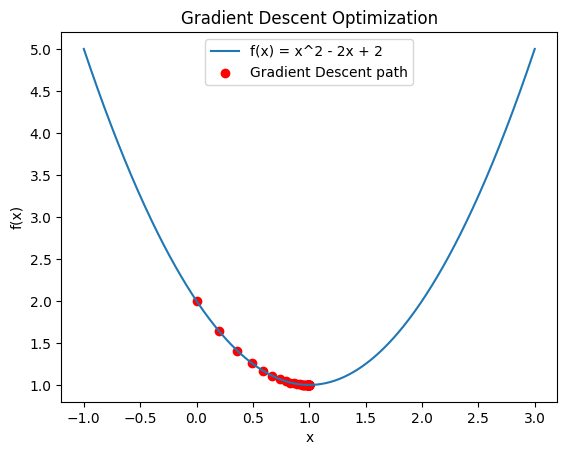

Number of iterations taken: 55
Global minima: 0.9999953231947606


In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Define the function f(x) = x^2 - 2x + 2
def f(x):
    return x**2 - 2*x + 2

# Implement the gradient descent algorithm
def gradient_descent(f, initial_x, learning_rate, precision):
    x = initial_x
    iterations = 0
    x_history = [x]
    while True:
        gradient = 2*x - 2  # Calculate the gradient
        new_x = x - learning_rate * gradient  # Update x
        if abs(new_x - x) < precision:  # Check convergence
            break
        x = new_x
        x_history.append(x)
        iterations += 1
    return x, iterations, x_history

# Set the initial parameters for gradient descent
initial_x = 0.0
learning_rate = 0.1
precision = 1e-6

# Apply gradient descent to find the global minima of f(x) = x^2 - 2x + 2
minima, iterations, x_history = gradient_descent(f, initial_x, learning_rate, precision)

# Visualize the results in a graph
x_values = np.linspace(-1, 3, 400)
y_values = f(x_values)
plt.plot(x_values, y_values, label='f(x) = x^2 - 2x + 2')
plt.scatter(x_history, [f(x) for x in x_history], color='red', label='Gradient Descent path')
plt.title('Gradient Descent Optimization')
plt.xlabel('x')
plt.ylabel('f(x)')
plt.legend()
plt.show()

# Print the number of iterations taken to identify the global minima
print("Number of iterations taken:", iterations)
print("Global minima:", minima)


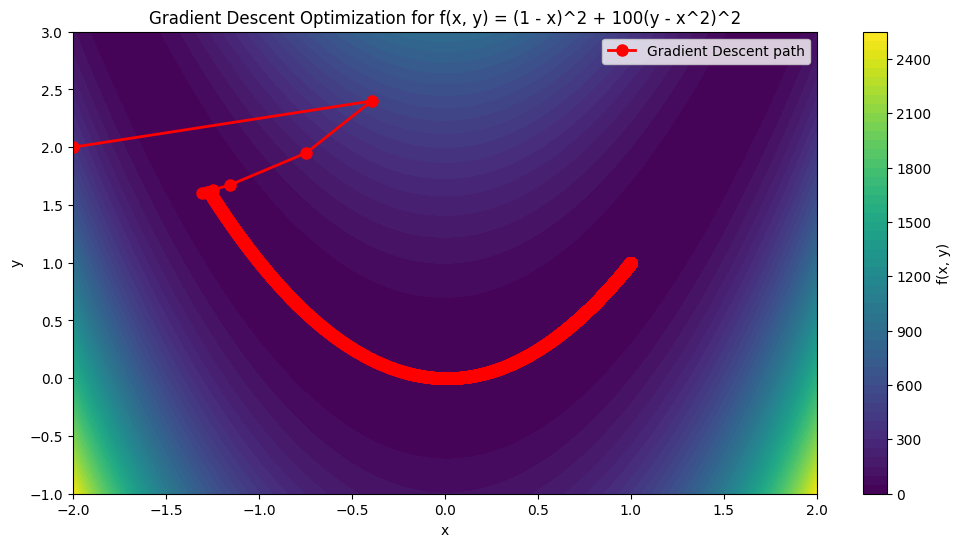

Number of iterations taken: 26389
Global minima (x, y): (0.9999875081739064, 0.9999749665162154)


In [7]:
from mpl_toolkits.mplot3d import Axes3D

# Define the function f(x, y) = (1 - x)^2 + 100(y - x^2)^2
def f(x, y):
    return (1 - x)**2 + 100 * (y - x**2)**2

# Implement the gradient descent algorithm for the function f(x, y)
def gradient_descent_2d(f, initial_x, initial_y, learning_rate, precision):
    x = initial_x
    y = initial_y  # Added "=" to assign initial_y to the variable y
    iterations = 0
    x_history = [x]  # Added "=" to assign the list [x] to the variable x_history
    y_history = [y]  # Added "=" to assign the list [y] to the variable y_history
    while True:
        gradient_x = -2 * (1 - x) + 200 * (y - x**2) * (-2 * x)  # Fixed the expression for gradient_x
        gradient_y = 200 * (y - x**2)  # Fixed the expression for gradient_y
        new_x = x - learning_rate * gradient_x  # Added "*" to compute the product of learning_rate and gradient_x
        new_y = y - learning_rate * gradient_y
        if abs(new_x - x) < precision and abs(new_y - y) < precision:  # Check convergence
            break
        x = new_x
        y = new_y
        x_history.append(x)
        y_history.append(y)
        iterations += 1
    return (x, y), iterations, x_history, y_history

# Set the initial parameters for gradient descent
initial_x = -2.0
initial_y = 2.0
learning_rate = 0.001  # Added "=" to assign the learning rate
precision = 1e-8

# Apply gradient descent to find the global minima of f(x, y) = (1 - x)^2 + 100(y - x^2)^2
minima, iterations, x_history, y_history = gradient_descent_2d(f, initial_x, initial_y, learning_rate, precision)  # Added "=" to assign the return values to variables

# Visualizing the results in a 3D graph
# Visualize the results in a 2D plot
plt.figure(figsize=(12, 6))
plt.contourf(x_values, y_values, z_values, levels=50, cmap='viridis')
plt.colorbar(label='f(x, y)')
plt.plot(x_history, y_history, color='red', marker='o', linestyle='-', linewidth=2, markersize=8, label='Gradient Descent path')
plt.title('Gradient Descent Optimization for f(x, y) = (1 - x)^2 + 100(y - x^2)^2')
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


# Print the number of iterations taken to identify the global minima
print("Number of iterations taken:", iterations)
print("Global minima (x, y):", minima)